<font color = "red">

Use this in the terminal:
pip install pydeseq2 umap-learn scipy scikit-learn matplotlib pandas numpy

.venv (Python 3.13.2)


In [2]:

# standard libraries
import os
import random
import pandas as pd
import numpy as np 
import scipy
import math
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from itertools import combinations

# differential expression
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

# dimentionality reduction and clustering
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
import umap


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
# DEFINING THRESHOLD VARIABLE FOR LOGFOLD CHANGE:

logfold_threshold = 1

In [ ]:
# load in individual dataframes associated wtih each testing condition. these were obtained in the data_analysis code from earlier

df_fearonly = pd.read_csv("Fearonly_Genes.csv")
df_context = pd.read_csv("Context_Genes.csv")
df_homecage = pd.read_csv("Homecage_Genes.csv")
df_fc = pd.read_csv("FearConditioned_Genes.csv")

# create a dictionary of these dataframes, associate with a label

df_dict = {
    "Homecage_Genes.csv": df_homecage,
    "Context_Genes.csv": df_context,
    "Fearonly_Genes.csv": df_fearonly,
    "FearConditioned_Genes.csv": df_fc
}

# display dataframes to quality check

for filename, dataframe in df_dict.items():
    display(dataframe) 

,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,Homecage_neg_p9_O21_S247_mouse2,0,0,33,111,0,0,7,77,3,...,0,0,0,0,0,0,0,0,0,0
1,Homecage_neg_p9_K14_S148_mouse2,0,0,287,60,0,0,0,81,12,...,0,0,0,0,0,0,0,0,0,0
2,Homecage_neg_p9_E22_S18_mouse2,0,0,73,26,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,0
3,Homecage_pos_p8_D22_S227_mouse2,0,0,0,855,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,Homecage_pos_p8_I21_S41_mouse2,0,0,0,378,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Homecage_p5_A11_neg_mouse4,0,0,421,510,0,0,7,0,14,...,0,0,0,0,0,0,0,0,0,0
296,Homecage_p5_O7_neg_mouse4,0,0,178,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
297,Homecage_p5_D12_neg_mouse4,0,0,52,10,0,0,49,27,19,...,0,0,0,0,0,0,0,0,0,0
298,Homecage_p5_P6_neg_mouse4,0,0,0,103,0,0,0,128,6,...,0,0,0,0,0,0,0,0,0,0


,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,Context_pos_p6_H17_S246_mouse2,1,0,95,1033,0,132,18,0,16,...,0,0,0,0,0,0,0,0,0,0
1,Context_pos_p6_F14_S197_mouse2,0,0,773,254,0,0,83,0,5,...,0,0,0,0,0,0,0,0,0,0
2,Context_neg_p7_E23_S115_mouse2,0,0,102,94,0,32,3,0,20,...,0,0,0,0,0,0,0,0,0,0
3,Context_pos_p6_O22_S112_mouse2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,Context_pos_p6_O20_S110_mouse2,0,0,283,664,0,0,0,1,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Context_p4_E6_neg_mouse4,0,0,342,148,0,31,0,1,4,...,0,0,0,0,0,0,0,0,0,0
653,Context_p4_K12_neg_mouse4,0,0,145,61,0,0,30,14,14,...,0,0,0,0,0,0,0,0,0,0
654,Context_p4_F9_neg_mouse4,0,0,580,76,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
655,Context_p4_P6_neg_mouse4,0,0,21,48,0,0,24,88,1,...,0,0,0,0,0,0,0,0,0,0


,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,Fearonly_pos_p4_G12_S94_mouse2,0,0,136,123,0,0,102,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fearonly_pos_p4_N14_S257_mouse2,0,0,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fearonly_pos_p4_N20_S263_mouse2,0,0,132,172,0,28,0,0,29,...,0,0,0,0,0,0,0,0,0,0
3,Fearonly_pos_p4_D6_S19_mouse2,0,0,212,103,0,0,31,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Fearonly_pos_p4_F12_S71_mouse2,0,0,48,0,0,45,0,0,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Fearonly_p3_K9_neg_mouse4,0,0,10,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663,Fearonly_p3_L11_neg_mouse4,0,0,140,116,0,0,0,162,45,...,0,0,0,0,0,0,0,0,0,0
664,Fearonly_p3_P9_neg_mouse4,0,0,13,0,0,0,0,4,6,...,0,0,0,0,0,0,0,0,0,0
665,Fearonly_p3_B8_neg_mouse4,0,0,32,158,0,0,0,143,0,...,0,0,0,0,0,0,0,0,0,0


,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,FC_pos_p1_G22_S200_mouse2,0,0,97,68,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
1,FC_neg_p3_G2_S16_mouse2,0,0,41,33,0,0,28,0,1,...,0,0,0,0,0,0,0,0,0,0
2,FC_pos_p10_J9_S188_mouse2,0,0,444,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,FC_pos_p1_E17_S149_mouse2,0,0,90,42,0,0,27,0,6,...,0,0,0,0,0,0,0,0,0,0
4,FC_neg_p3_P5_S226_mouse2,0,0,53,1,0,0,0,65,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,FC_p1_L18_pos_mouse4,0,0,179,168,0,0,0,199,14,...,0,0,0,0,0,0,0,0,0,0
1053,FC_p1_L17_pos_mouse4,0,0,3,36,0,0,15,0,26,...,0,0,0,0,0,0,0,0,0,0
1054,FC_p1_P11_pos_mouse4,0,0,48,75,0,3,0,42,6,...,0,0,0,0,0,0,0,0,0,0
1055,FC_p1_P7_pos_mouse4,0,0,14,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color = "orange">

We will now begin the scRNA-seq analysis and visualization of the data. In this next section, we are creating volcano plots to visualize differentially expressed genes.

In [ ]:
# assigning a unique number to every replicate. computationally intensive when running DESEQ2, but more accurate analysis
# adding a cluster label, which is unique for each condition tested. also, create a column for replicates and assign a temporary value
for filename, dataframe in df_dict.items():
    if filename == "Fearonly_Genes.csv":
        dataframe["cluster"] = 2
        dataframe["replicates"] = 0
    elif filename == "Context_Genes.csv":
        dataframe["cluster"] = 3
        dataframe["replicates"] = 0
    elif filename == "Homecage_Genes.csv":
        dataframe["cluster"] = 0
        dataframe["replicates"] = 0
    elif filename == "FearConditioned_Genes.csv":
        dataframe["cluster"] = 1
        dataframe["replicates"] = 0
    
    # each row gets a unique number
    count = 1
    for index, row in dataframe.iterrows():
        dataframe.at[index, 'replicates'] = count  # Assign the value to the specific row
        count += 1

    display(dataframe.head())


,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9,cluster,replicates
0,Homecage_neg_p9_O21_S247_mouse2,0,0,33,111,0,0,7,77,3,...,0,0,0,0,0,0,0,0,0,1
1,Homecage_neg_p9_K14_S148_mouse2,0,0,287,60,0,0,0,81,12,...,0,0,0,0,0,0,0,0,0,2
2,Homecage_neg_p9_E22_S18_mouse2,0,0,73,26,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,3
3,Homecage_pos_p8_D22_S227_mouse2,0,0,0,855,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,4
4,Homecage_pos_p8_I21_S41_mouse2,0,0,0,378,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,5


,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9,cluster,replicates
0,Context_pos_p6_H17_S246_mouse2,1,0,95,1033,0,132,18,0,16,...,0,0,0,0,0,0,0,0,3,1
1,Context_pos_p6_F14_S197_mouse2,0,0,773,254,0,0,83,0,5,...,0,0,0,0,0,0,0,0,3,2
2,Context_neg_p7_E23_S115_mouse2,0,0,102,94,0,32,3,0,20,...,0,0,0,0,0,0,0,0,3,3
3,Context_pos_p6_O22_S112_mouse2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,3,4
4,Context_pos_p6_O20_S110_mouse2,0,0,283,664,0,0,0,1,7,...,0,0,0,0,0,0,0,0,3,5


,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9,cluster,replicates
0,Fearonly_pos_p4_G12_S94_mouse2,0,0,136,123,0,0,102,0,0,...,0,0,0,0,0,0,0,0,2,1
1,Fearonly_pos_p4_N14_S257_mouse2,0,0,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
2,Fearonly_pos_p4_N20_S263_mouse2,0,0,132,172,0,28,0,0,29,...,0,0,0,0,0,0,0,0,2,3
3,Fearonly_pos_p4_D6_S19_mouse2,0,0,212,103,0,0,31,2,1,...,0,0,0,0,0,0,0,0,2,4
4,Fearonly_pos_p4_F12_S71_mouse2,0,0,48,0,0,45,0,0,8,...,0,0,0,0,0,0,0,0,2,5


,GeneName,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9,cluster,replicates
0,FC_pos_p1_G22_S200_mouse2,0,0,97,68,0,0,0,9,0,...,0,0,0,0,0,0,0,0,1,1
1,FC_neg_p3_G2_S16_mouse2,0,0,41,33,0,0,28,0,1,...,0,0,0,0,0,0,0,0,1,2
2,FC_pos_p10_J9_S188_mouse2,0,0,444,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,3
3,FC_pos_p1_E17_S149_mouse2,0,0,90,42,0,0,27,0,6,...,0,0,0,0,0,0,0,0,1,4
4,FC_neg_p3_P5_S226_mouse2,0,0,53,1,0,0,0,65,0,...,0,0,0,0,0,0,0,0,1,5


<font color = "orange">

In this next section, we are combining the dataframes for comparison. When we are comparing homecage to fear conditioned, we will be combining the dataframes df_homecage and df_fc. We will do this for all comparisons we will be making (6 total). 

- df_0_1 is homecage versus fear conditioned (NO FEAR vs FEAR)
- df_0_2 is homecage versus fear only (NO FEAR vs FEAR)
- df_0_3 is homecage versus recall only (NO FEAR vs NO FEAR)
- df_1_2 is fear conditioned versus fear only (FEAR vs FEAR)
- df_1_3 is fear conditioned versus recall only (FEAR VS NO FEAR)
- df_2_3 is fear only versus recall only (FEAR VS NO FEAR)

In [ ]:
# we are combining dataframes and putting them into a dictionary to reference later
# for example, if we are comparing scRNA-seq data from Homecage versus Fear Conditioned, we combine df_homecage with df_fc

dataframes_volcanoplots = {
    "df_0_1": pd.concat([df_homecage, df_fc], ignore_index=True),
    "df_0_2": pd.concat([df_homecage, df_fearonly], ignore_index=True),
    "df_0_3": pd.concat([df_homecage, df_context], ignore_index=True),
    "df_1_2": pd.concat([df_fc, df_fearonly], ignore_index=True),
    "df_1_3": pd.concat([df_fc, df_context], ignore_index=True),
    "df_2_3": pd.concat([df_fearonly, df_context], ignore_index=True),
}

# groupby function each dataframe based upon the clustering ID
grouped_df = {}

for label, dataframe in dataframes_volcanoplots.items():
    dataframe = dataframe.set_index("GeneName")
    display(dataframe.shape) 
    grouped = dataframe.groupby(['replicates', 'cluster']).sum().reset_index()
    display(grouped)
    grouped_df[label] = grouped



(1357, 23357)

,replicates,cluster,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,1,0,0,0,33,111,0,0,7,77,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,97,68,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,287,60,0,0,0,81,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,41,33,0,0,28,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,73,26,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,1053,1,0,0,179,168,0,0,0,199,...,0,0,0,0,0,0,0,0,0,0
1353,1054,1,0,0,3,36,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0
1354,1055,1,0,0,48,75,0,3,0,42,...,0,0,0,0,0,0,0,0,0,0
1355,1056,1,0,0,14,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(967, 23357)

,replicates,cluster,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,1,0,0,0,33,111,0,0,7,77,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,136,123,0,0,102,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,287,60,0,0,0,81,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,73,26,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,663,2,0,0,10,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
963,664,2,0,0,140,116,0,0,0,162,...,0,0,0,0,0,0,0,0,0,0
964,665,2,0,0,13,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
965,666,2,0,0,32,158,0,0,0,143,...,0,0,0,0,0,0,0,0,0,0


(957, 23357)

,replicates,cluster,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,1,0,0,0,33,111,0,0,7,77,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1,0,95,1033,0,132,18,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,287,60,0,0,0,81,...,0,0,0,0,0,0,0,0,0,0
3,2,3,0,0,773,254,0,0,83,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,73,26,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,653,3,0,0,342,148,0,31,0,1,...,0,0,0,0,0,0,0,0,0,0
953,654,3,0,0,145,61,0,0,30,14,...,0,0,0,0,0,0,0,0,0,0
954,655,3,0,0,580,76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
955,656,3,0,0,21,48,0,0,24,88,...,0,0,0,0,0,0,0,0,0,0


(1724, 23357)

,replicates,cluster,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,1,1,0,0,97,68,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,136,123,0,0,102,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,41,33,0,0,28,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,0,444,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,1053,1,0,0,179,168,0,0,0,199,...,0,0,0,0,0,0,0,0,0,0
1720,1054,1,0,0,3,36,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0
1721,1055,1,0,0,48,75,0,3,0,42,...,0,0,0,0,0,0,0,0,0,0
1722,1056,1,0,0,14,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1714, 23357)

,replicates,cluster,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,1,1,0,0,97,68,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1,0,95,1033,0,132,18,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,41,33,0,0,28,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,0,0,773,254,0,0,83,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,0,444,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,1053,1,0,0,179,168,0,0,0,199,...,0,0,0,0,0,0,0,0,0,0
1710,1054,1,0,0,3,36,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0
1711,1055,1,0,0,48,75,0,3,0,42,...,0,0,0,0,0,0,0,0,0,0
1712,1056,1,0,0,14,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1324, 23357)

,replicates,cluster,00R-AC107638.2,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,...,Kcnq1,Mageb16,Pdxk-ps,Ptprv,RP23-151L20.4,RP23-268A5.2,RP24-472F16.1,Ston1,Ttll10,Zbtb9
0,1,2,0,0,136,123,0,0,102,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1,0,95,1033,0,132,18,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,0,0,773,254,0,0,83,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,0,0,132,172,0,28,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,663,2,0,0,10,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,664,2,0,0,140,116,0,0,0,162,...,0,0,0,0,0,0,0,0,0,0
1321,665,2,0,0,13,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1322,666,2,0,0,32,158,0,0,0,143,...,0,0,0,0,0,0,0,0,0,0


<font color = "orange">

Now we will be doing the differential expression analysis.

In [ ]:
# differential expression analysis code

de_results = {}

# iterating through each combined df and storing and then dropping the cluster label colum from the dataframe
for label, dataframe in grouped_df.items():
    rep_cluster_labels = dataframe.cluster
    dataframe = dataframe.drop(['replicates', 'cluster'], axis = 1)

    # remove columns with no counts or no variance in counts
    dataframe = dataframe.loc[:, dataframe.sum(axis=0) != 0]
    dataframe = dataframe.loc[:, dataframe.var(axis=0) != 0]

    # Prepare the count matrix
    count_matrix = dataframe.values  # Convert to numpy array
    genes = dataframe.columns  # Gene names
    samples = dataframe.index  # Sample names

    # Prepare the condition labels
    condition_labels = rep_cluster_labels.astype(str) # Condition labels

    # Ensure that condition_labels corresponds to the sample order
    if len(condition_labels) != len(samples):
        raise ValueError("Condition labels must match the number of samples.")

    # 3. Create the DeseqDataSet object
    # Create a metadata dataframe for conditions
    metadata = pd.DataFrame({'condition': condition_labels}, index=samples)
    metadata['condition'] = metadata['condition'].astype('category') # ADDED

    print(metadata['condition'].unique())
    print(label)

    # Create the DeseqDataSet using count matrix and metadata
    dds = DeseqDataSet(counts=count_matrix, metadata=metadata)

    # Initialize inference engine
    inference = DefaultInference(n_cpus=8)

    # Create the DESeq2 dataset
    dds = DeseqDataSet(
        counts=count_matrix,
        metadata=metadata,
    )

    # identifying which combination comparison we are doing
    comparisons = ["0_1", "0_2", "0_3", "1_2", "1_3", "2_3"] # this is all the possible combinations
    # checking for which combination it is 
    for comparison in comparisons:
        if comparison in label:
            characters = list(comparison)
            x = str(characters[0])
            y = str(characters[2])
            break

    dds.deseq2()
    # Extract results
    res = DeseqStats(dds, contrast=["condition",y,x])
    res.summary()

    # Get the results as a DataFrame
    DE_results_df = res.results_df
    DE_results_df["gene_name"] = list(dataframe.columns)
    display(DE_results_df.head())

    de_results[label] = DE_results_df


['0', '1']
Categories (2, object): ['0', '1']
df_0_1
Using None as control genes, passed at DeseqDataSet initialization


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Fitting size factors...
... done in 0.29 seconds.

Fitting dispersions...
... done in 3.72 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 3.21 seconds.

Fitting LFCs...
... done in 3.81 seconds.

Calculating cook's distance...
... done in 1.26 seconds.

Replacing 9249 outlier genes.

Fitting dispersions...
... done in 1.37 seconds.

Fitting MAP disp

Log2 fold change & Wald test p-value: condition 1 vs 0
        baseMean  log2FoldChange     lfcSE      stat        pvalue  \
0       0.079037        0.377083  1.543429  0.244315  8.069868e-01   
1       0.083383        0.869958  2.151289  0.404389  6.859266e-01   
2      72.019783        0.129975  0.107888  1.204724  2.283098e-01   
3      49.234339       -0.936879  0.146168 -6.409602  1.459002e-10   
4       0.455788       -0.024053  0.732670 -0.032829  9.738106e-01   
...          ...             ...       ...       ...           ...   
23238   0.005833        0.367538  3.485153  0.105458  9.160123e-01   
23239   0.002371        0.480522  3.485641  0.137858  8.903530e-01   
23240   0.000439        0.495975  3.485751  0.142286  8.868537e-01   
23241   0.003892        0.504683  3.485740  0.144785  8.848806e-01   
23242   0.050117        0.601132  3.485618  0.172461  8.630753e-01   

               padj  
0               NaN  
1               NaN  
2      3.609478e-01  
3      2.357105e

... done in 0.70 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,0.079037,0.377083,1.543429,0.244315,8.069868e-01,NaN,00R-AC107638.2
1,0.083383,0.869958,2.151289,0.404389,6.859266e-01,NaN,0610005C13Rik
2,72.019783,0.129975,0.107888,1.204724,2.283098e-01,3.609478e-01,0610007P14Rik
3,49.234339,-0.936879,0.146168,-6.409602,1.459002e-10,2.357105e-09,0610009B22Rik
4,0.455788,-0.024053,0.732670,-0.032829,9.738106e-01,9.832173e-01,0610009E02Rik


['0', '2']
Categories (2, object): ['0', '2']
df_0_2
Using None as control genes, passed at DeseqDataSet initialization


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Fitting size factors...
... done in 0.22 seconds.

Fitting dispersions...
... done in 2.58 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 2.58 seconds.

Fitting LFCs...
... done in 3.20 seconds.

Calculating cook's distance...
... done in 0.87 seconds.

Replacing 9690 outlier genes.

Fitting dispersions...
... done in 1.24 seconds.

Fitting MAP disp

Log2 fold change & Wald test p-value: condition 2 vs 0
        baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0       0.048880        0.021344  2.004662  0.010647  0.991505       NaN
1       0.211221        0.720258  1.887401  0.381613  0.702748       NaN
2      97.254914        0.289634  0.117556  2.463800  0.013747  0.061440
3      76.433963       -0.465537  0.156783 -2.969309  0.002985  0.019477
4       0.709038        0.291762  0.849278  0.343542  0.731191  0.848767
...          ...             ...       ...       ...       ...       ...
23157   0.000753        0.130916  3.130270  0.041823  0.966640       NaN
23158   0.010128        0.018543  3.129681  0.005925  0.995273       NaN
23159   0.008612        0.125577  3.130203  0.040118  0.967999       NaN
23160   0.003288        0.174761  3.130243  0.055830  0.955477       NaN
23161   0.000000        0.000000  0.000000  0.000000       NaN       NaN

[23162 rows x 6 columns]


... done in 0.60 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,0.048880,0.021344,2.004662,0.010647,0.991505,NaN,00R-AC107638.2
1,0.211221,0.720258,1.887401,0.381613,0.702748,NaN,0610005C13Rik
2,97.254914,0.289634,0.117556,2.463800,0.013747,0.061440,0610007P14Rik
3,76.433963,-0.465537,0.156783,-2.969309,0.002985,0.019477,0610009B22Rik
4,0.709038,0.291762,0.849278,0.343542,0.731191,0.848767,0610009E02Rik


['0', '3']
Categories (2, object): ['0', '3']
df_0_3
Using None as control genes, passed at DeseqDataSet initialization


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Fitting size factors...
... done in 0.21 seconds.

Fitting dispersions...
... done in 2.54 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 2.47 seconds.

Fitting LFCs...
... done in 3.16 seconds.

Calculating cook's distance...
... done in 0.73 seconds.

Replacing 10285 outlier genes.

Fitting dispersions...
... done in 1.61 seconds.

Fitting MAP dis

Log2 fold change & Wald test p-value: condition 3 vs 0
        baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0       0.056293       -0.018758  1.899943 -0.009873  0.992123       NaN
1       0.091068        0.568097  1.767755  0.321367  0.747933       NaN
2      83.699190       -0.044911  0.143536 -0.312887  0.754366  0.889699
3      84.031176       -0.313864  0.172932 -1.814959  0.069530  0.241821
4       0.566192       -0.158130  0.841805 -0.187847  0.850997  0.938758
...          ...             ...       ...       ...       ...       ...
23103   0.027652        0.241424  3.121243  0.077349  0.938346       NaN
23104   0.052736        0.025399  3.120781  0.008139  0.993506       NaN
23105   0.011865        0.077586  2.594647  0.029902  0.976145       NaN
23106   0.130285        0.070061  3.121644  0.022444  0.982094       NaN
23107   0.011471        0.093554  3.121587  0.029970  0.976091       NaN

[23108 rows x 6 columns]


... done in 0.62 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,0.056293,-0.018758,1.899943,-0.009873,0.992123,NaN,00R-AC107638.2
1,0.091068,0.568097,1.767755,0.321367,0.747933,NaN,0610005C13Rik
2,83.699190,-0.044911,0.143536,-0.312887,0.754366,0.889699,0610007P14Rik
3,84.031176,-0.313864,0.172932,-1.814959,0.069530,0.241821,0610009B22Rik
4,0.566192,-0.158130,0.841805,-0.187847,0.850997,0.938758,0610009E02Rik


['1', '2']
Categories (2, object): ['1', '2']
df_1_2


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.41 seconds.

Fitting dispersions...
... done in 4.30 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 4.16 seconds.

Fitting LFCs...
... done in 3.95 seconds.

Calculating cook's distance...
... done in 1.67 seconds.

Replacing 7885 outlier genes.

Fitting dispersions...
... done in 1.50 seconds.

Fitting MAP dispersions...
... done in 1.26 seconds.

Fitting LFCs...
... done in 1.34 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 2 vs 1
        baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0       0.055843       -0.417739  1.247521 -0.334855  0.737734       NaN
1       0.155341       -0.204490  1.240689 -0.164820  0.869086       NaN
2      78.903473        0.140641  0.070947  1.982348  0.047440  0.188475
3      47.635483        0.396609  0.107592  3.686226  0.000228  0.003036
4       0.468593        0.274538  0.545475  0.503301  0.614753       NaN
...          ...             ...       ...       ...       ...       ...
23267   0.000000        0.000000  0.000000  0.000000       NaN       NaN
23268   0.003723       -0.410281  2.968171 -0.138227  0.890061       NaN
23269   0.002211       -0.375795  2.968105 -0.126611  0.899248       NaN
23270   0.003156       -0.417954  2.968179 -0.140812  0.888019       NaN
23271   0.042223       -0.513856  2.968037 -0.173130  0.862549       NaN

[23272 rows x 6 columns]


... done in 0.86 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,0.055843,-0.417739,1.247521,-0.334855,0.737734,NaN,00R-AC107638.2
1,0.155341,-0.204490,1.240689,-0.164820,0.869086,NaN,0610005C13Rik
2,78.903473,0.140641,0.070947,1.982348,0.047440,0.188475,0610007P14Rik
3,47.635483,0.396609,0.107592,3.686226,0.000228,0.003036,0610009B22Rik
4,0.468593,0.274538,0.545475,0.503301,0.614753,NaN,0610009E02Rik


['1', '3']
Categories (2, object): ['1', '3']
df_1_3


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.38 seconds.

Fitting dispersions...
... done in 3.77 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 4.03 seconds.

Fitting LFCs...
... done in 4.50 seconds.

Calculating cook's distance...
... done in 1.66 seconds.

Replacing 8855 outlier genes.

Fitting dispersions...
... done in 1.65 seconds.

Fitting MAP dispersions...
... done in 1.43 seconds.

Fitting LFCs...
... done in 1.63 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 3 vs 1
        baseMean  log2FoldChange     lfcSE      stat        pvalue  \
0       0.061253       -0.335137  1.224042 -0.273796  7.842418e-01   
1       0.110685       -0.248043  1.181590 -0.209923  8.337279e-01   
2      73.205492       -0.097134  0.082503 -1.177337  2.390610e-01   
3      53.248492        0.758799  0.116123  6.534444  6.384609e-11   
4       0.433549       -0.074971  0.546297 -0.137234  8.908459e-01   
...          ...             ...       ...       ...           ...   
23278   0.016617       -0.272786  2.973177 -0.091749  9.268974e-01   
23279   0.005247       -0.331335  2.564938 -0.129178  8.972165e-01   
23280   0.046966       -0.354079  2.973370 -0.119084  9.052092e-01   
23281   0.008049       -0.339841  2.973297 -0.114298  9.090019e-01   
23282   0.037422       -0.482876  2.973269 -0.162406  8.709865e-01   

               padj  
0               NaN  
1               NaN  
2      5.009047e-01  
3      1.682643e

... done in 0.90 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,0.061253,-0.335137,1.224042,-0.273796,7.842418e-01,NaN,00R-AC107638.2
1,0.110685,-0.248043,1.181590,-0.209923,8.337279e-01,NaN,0610005C13Rik
2,73.205492,-0.097134,0.082503,-1.177337,2.390610e-01,5.009047e-01,0610007P14Rik
3,53.248492,0.758799,0.116123,6.534444,6.384609e-11,1.682643e-09,0610009B22Rik
4,0.433549,-0.074971,0.546297,-0.137234,8.908459e-01,9.536501e-01,0610009E02Rik


['2', '3']
Categories (2, object): ['2', '3']
df_2_3
Using None as control genes, passed at DeseqDataSet initialization


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Fitting size factors...
... done in 0.28 seconds.

Fitting dispersions...
... done in 3.06 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 3.00 seconds.

Fitting LFCs...
... done in 3.90 seconds.

Calculating cook's distance...
... done in 1.11 seconds.

Replacing 9440 outlier genes.

Fitting dispersions...
... done in 1.39 seconds.

Fitting MAP disp

Log2 fold change & Wald test p-value: condition 3 vs 2
        baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0       0.038227        0.066205  1.602555  0.041312  0.967047       NaN
1       0.208673       -0.051253  1.133076 -0.045234  0.963921       NaN
2      90.215482       -0.231887  0.093094 -2.490887  0.012742  0.123524
3      73.483857        0.348646  0.130543  2.670737  0.007569  0.082951
4       0.603106       -0.431430  0.642316 -0.671678  0.501789  0.894823
...          ...             ...       ...       ...       ...       ...
23221   0.019403        0.204848  2.892843  0.070812  0.943548       NaN
23222   0.029440        0.115648  2.893061  0.039974  0.968114       NaN
23223   0.011586        0.059756  2.498299  0.023919  0.980917       NaN
23224   0.062053        0.002793  2.893174  0.000965  0.999230       NaN
23225   0.008012        0.059956  2.893204  0.020723  0.983467       NaN

[23226 rows x 6 columns]


... done in 0.72 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,0.038227,0.066205,1.602555,0.041312,0.967047,NaN,00R-AC107638.2
1,0.208673,-0.051253,1.133076,-0.045234,0.963921,NaN,0610005C13Rik
2,90.215482,-0.231887,0.093094,-2.490887,0.012742,0.123524,0610007P14Rik
3,73.483857,0.348646,0.130543,2.670737,0.007569,0.082951,0610009B22Rik
4,0.603106,-0.431430,0.642316,-0.671678,0.501789,0.894823,0610009E02Rik


<font color = "orange">

- Below, we define a function to do the volcano plot. It intakes the dataframe for comparison (i.e. df_0_1), the label, the number of significant fold changes as determined by BH, and the BH p-value threshold. It will output a graph. 
- The code block below it cycles through all dataframes created above (i.e. df_0_1) and determines the correct BH corrected p-values and calls the volcano plot function to visualize the data. 

In [41]:
# volcano plot function

def volcano_plot(dataframe, label, sig_BH, BH_pval_threshold):
    plt.figure(figsize=(8,6))

    # scatter plot displaying the original data from the differential gene analysis
    plt.scatter(dataframe['log2FoldChange'], -np.log(dataframe['pvalue']), alpha=0.5)

    plt.title('P-values against log2-fold change ' +  str(label))

    # BH significant and adjusted scatter plot
    plt.scatter(sig_BH.log2FoldChange, -np.log10(sig_BH.pvalue), alpha = 0.5, s = 10, label="Significant (BH adj)")

    # Highlight "Tagap" for visualization purposes - this was after we identified this as the gene of interest
    tagap_gene = dataframe[dataframe['gene_name'] == "Tagap"]
    if not tagap_gene.empty:
        plt.scatter(tagap_gene.log2FoldChange, -np.log10(tagap_gene.pvalue), color="red", s=50, label="Tagap", edgecolors="black", linewidth=1.5)
        for _, row in tagap_gene.iterrows():
            plt.annotate("Tagap", (row['log2FoldChange'], -np.log10(row['pvalue'])), fontsize=10, color="red", ha='right', xytext = (4,100),textcoords='offset points',
                         arrowprops=dict(arrowstyle="-", color="red", lw=1))


    # Add significance thresholds
    plt.axhline(-np.log10(BH_pval_threshold), linestyle="--", color="blue",label="BH p-value threshold")
    plt.axvline(logfold_threshold, linestyle="--", color="red", label="Log2FC > " + str(logfold_threshold))
    plt.axvline(-logfold_threshold, linestyle="--", color="red", label="Log2FC < " + str(-logfold_threshold))

    plt.xlabel("Log2 Fold Change")
    plt.ylabel("-Log10  adjusted p value")

    plt.legend()

    plt.show()

Homecage versus FearConditioned


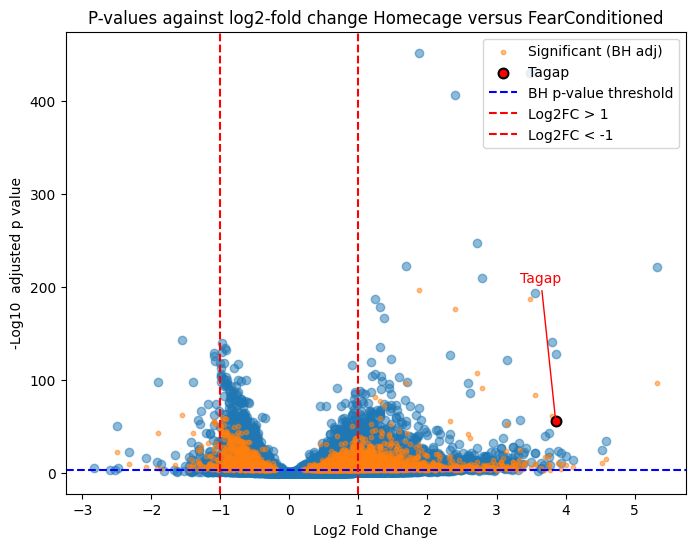

Homecage versus FearOnly


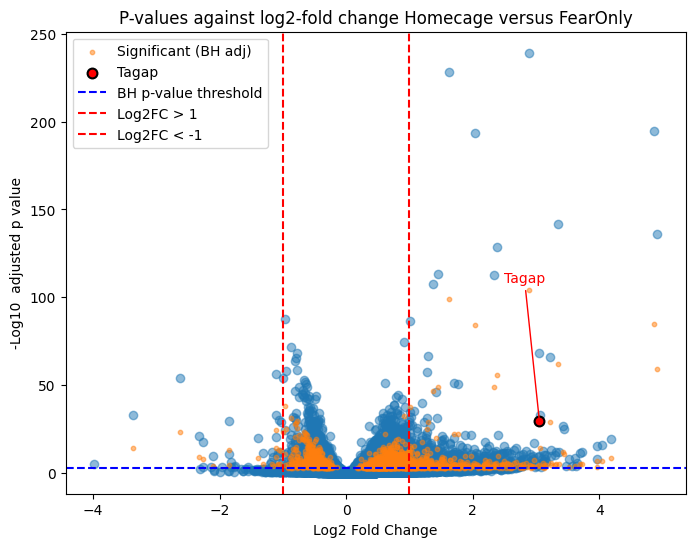

Homecage versus RecallOnly


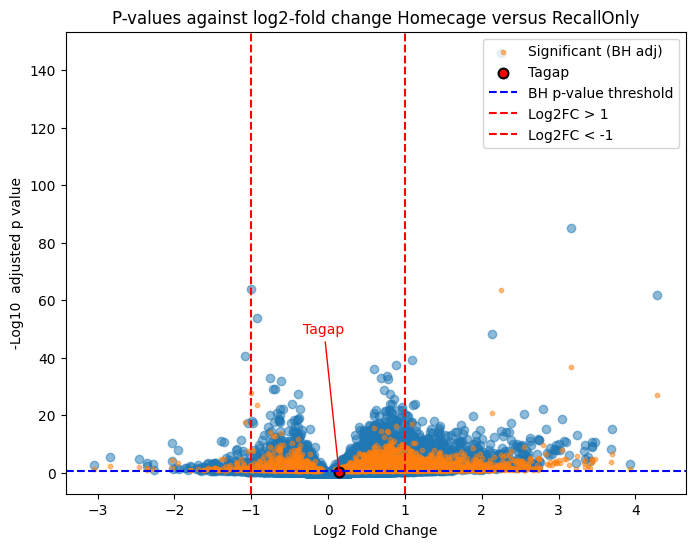

FearConditioned versus FearOnly


/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jasoncui/Desktop/Stanford_Undergrad/Class_Files/Junior/Winter 2025/BIO 165/FinalProject/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


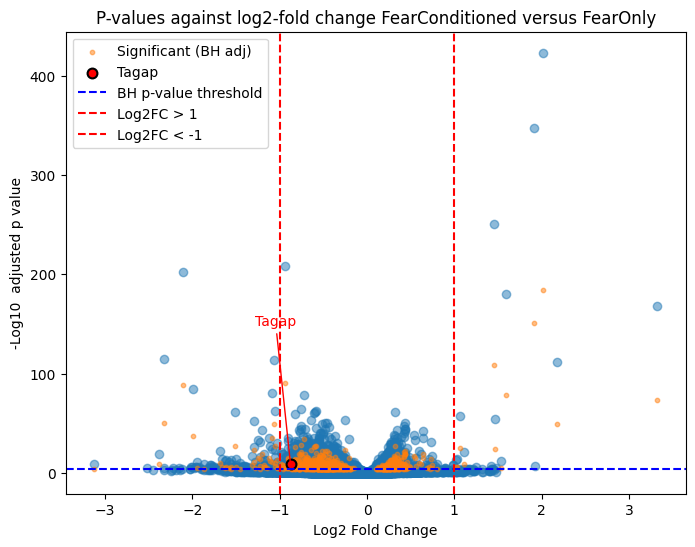

FearConditioned versus RecallOnly


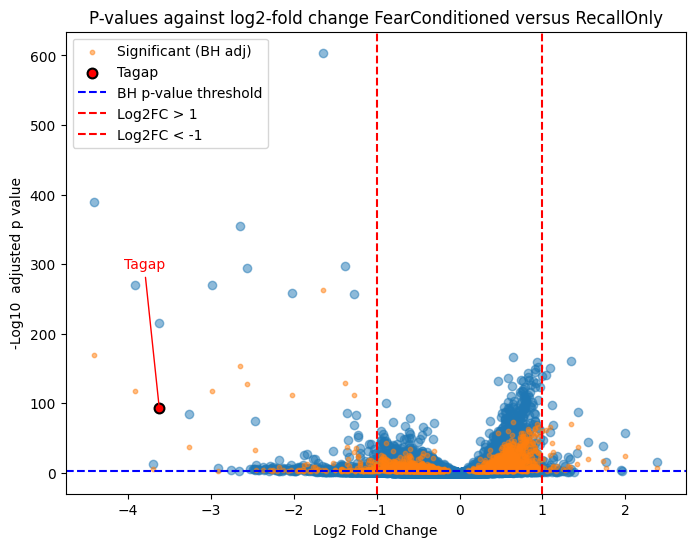

FearOnly versus RecallOnly


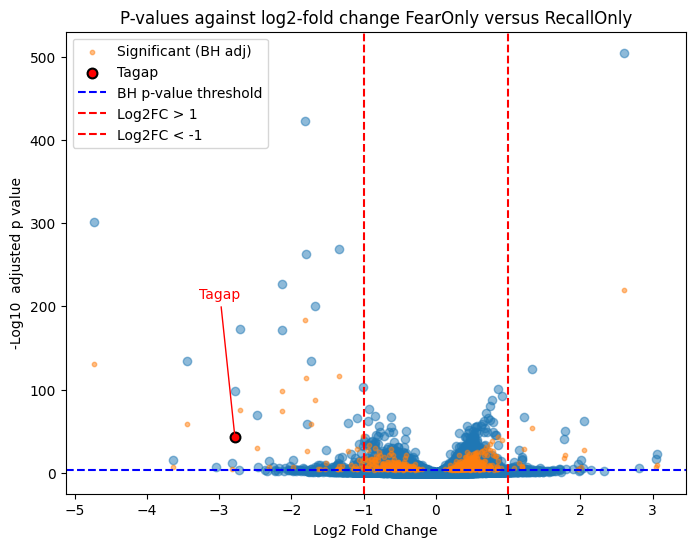

In [42]:
# cycle through all six comparisons and create volcano plot for each. include the thresholds

for label, dataframe in de_results.items():
    # getting a list of all the p-values
    p_value = list(dataframe.pvalue.values)
    p_value.sort()
    n_tests = dataframe.shape[0]
    alpha = 0.005

    # bh_critical_values = (np.arange(1, n_tests + 1) / n_tests) * alpha

    # get the alpha cutoff values be drawing a line between the Bonferroni cutoff (0.08/n_tests) and the original threshold (0.08)
    alpha_cutoff = np.arange(0, n_tests)*((alpha - alpha/n_tests))/n_tests + alpha/n_tests

    # find the p-values that are below the alpha-cutoff line
    n_pvals_below_cutoff = len([x for x in alpha_cutoff - p_value if x >= 0])

    BH_pval_threshold = p_value[n_pvals_below_cutoff-1]
    print(BH_pval_threshold)

    dataframe["sig_BH"] = np.where((dataframe['pvalue'] < BH_pval_threshold), 1, 0)
    dataframe["p_adj_BH"] = dataframe['pvalue'] * alpha/BH_pval_threshold

    # determine the significant BH level
    sig_BH = dataframe.loc[dataframe.sig_BH == 1]

    # Rename the labels for clarity
    if label == "df_0_1":
        name = "Homecage versus FearConditioned"
    elif label == "df_0_2":
        name = "Homecage versus FearOnly"
    elif label == "df_0_3":
        name = "Homecage versus RecallOnly"
    elif label == "df_1_2":
        name = "FearConditioned versus FearOnly"
    elif label == "df_1_3":
        name = "FearConditioned versus RecallOnly"
    elif label == "df_2_3":
        name = "FearOnly versus RecallOnly"
    else:
        name = "Unknown Comparison"  # Handle unexpected labels

    # Graph
    print(name)
    volcano_plot(dataframe, name, sig_BH, BH_pval_threshold)

In [45]:
sig_de = {} # library of df of significant differential expressed genes (threshold decided below)
sig_de_exclude_gm = {} # library of df of significant differential expressed genes (threshold decided below) that excludes genes with unknown functions (GM)

for label, dataframe in de_results.items():
    # create dataframes that only contain sig_BH genes
    bh_sig_df = dataframe[(dataframe['sig_BH'] == 1) & ((dataframe['log2FoldChange'] >= logfold_threshold) | (dataframe['log2FoldChange'] <= -logfold_threshold))]
    sig_de[label] = bh_sig_df

    # create dataframes that contain sig_BH genes but excludes any gm denoted genes
    bh_sig_df_exclusion = bh_sig_df[~bh_sig_df['gene_name'].str.contains('Gm', case=False, na=False)]
    sig_de_exclude_gm[label] = bh_sig_df_exclusion

    # Rename the labels for clarity
    if label == "df_0_1":
        name = "Homecage versus FearConditioned"
    elif label == "df_0_2":
        name = "Homecage versus FearOnly"
    elif label == "df_0_3":
        name = "Homecage versus RecallOnly"
    elif label == "df_1_2":
        name = "FearConditioned versus FearOnly"
    elif label == "df_1_3":
        name = "FearConditioned versus RecallOnly"
    elif label == "df_2_3":
        name = "FearOnly versus RecallOnly"
    else:
        name = "Unknown Comparison"  # Handle unexpected labels

    print("This is for " + name)
    display(bh_sig_df_exclusion.head(5))

# EXTRA CODE, USED FOR CHECKING

    # print("This is a list of all differentially expressed genes determined in this comparison:")
    # print(de_genes)

# # check for common de genes across all comparisons
# gene_sets = {key: set(value) for key, value in sig_de_genes.items()}

# # Iterate through all possible pairs of samples
# for (key1, key2) in combinations(gene_sets.keys(), 2):
#     common_genes = gene_sets[key1] & gene_sets[key2]  # Intersection
#     if common_genes:
#         print(f"Common genes between {key1} and {key2} comparison: {common_genes}")



This is for Homecage versus FearConditioned


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
32,6.746280,1.538425,0.357376,4.304784,1.671488e-05,1.112468e-04,1110032F04Rik,1,1.073416e-04
35,7.657885,1.096536,0.303790,3.609518,3.067668e-04,1.490579e-03,1110037F02Rik,1,1.970030e-03
92,0.480981,1.211019,0.195540,6.193192,5.895776e-10,8.744840e-09,1700022I11Rik,1,3.786218e-09
120,7.193522,1.656167,0.257199,6.439253,1.200626e-10,1.970342e-09,1700066M21Rik,1,7.710319e-10
150,14.270131,1.122586,0.277631,4.043449,5.267060e-05,3.102569e-04,1810030O07Rik,1,3.382462e-04


This is for Homecage versus FearOnly


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
120,4.949595,1.066194,0.337505,3.159049,0.001583,0.011951,1700066M21Rik,1,0.003921
144,2.374802,1.167488,0.306479,3.809357,0.000139,0.001648,1810014B01Rik,1,0.000345
241,14.879007,1.083432,0.266547,4.064688,0.000048,0.000696,2610203C20Rik,1,0.000119
309,2.294924,3.305207,0.800121,4.130882,0.000036,0.000543,3110001I22Rik,1,0.000090
314,13.123607,-1.084547,0.273577,-3.964313,0.000074,0.000979,3110039M20Rik,1,0.000182


This is for Homecage versus RecallOnly


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
32,6.299733,1.160465,0.426949,2.718042,0.006567,0.053331,1110032F04Rik,1,0.000189
35,10.308166,1.288416,0.360417,3.574796,0.000351,0.006732,1110037F02Rik,1,0.000010
47,1.721395,1.082654,0.695231,1.557258,0.119409,0.332878,1500002C15Rik,1,0.003434
57,1.375489,1.678842,0.816370,2.056472,0.039737,0.170324,1500035N22Rik,1,0.001143
64,1.424537,-2.356703,1.379349,-1.708562,0.087532,0.276911,1600023N17Rik,1,0.002518


This is for FearConditioned versus FearOnly


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
301,10.353790,1.033188,0.214890,4.807995,1.524516e-06,4.512370e-05,2900076A07Rik,1,3.435122e-05
1205,4.567549,-2.381641,0.406468,-5.859357,4.646618e-09,2.727268e-07,Aldh1l1,1,1.047001e-07
1460,199.964943,-1.245580,0.158426,-7.862239,3.773285e-15,6.848016e-13,Arc,1,8.502173e-14
2034,46.542542,-1.049014,0.200042,-5.243979,1.571499e-07,5.971262e-06,Bhlhe40,1,3.540987e-06
2069,5.072012,-1.499548,0.312166,-4.803682,1.557739e-06,4.600833e-05,Bmper,1,3.509982e-05


This is for FearConditioned versus RecallOnly


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
5,3.121480,1.269227,0.311435,4.075421,4.593109e-05,5.140823e-04,0610009L18Rik,1,1.126521e-04
24,3.174710,-1.088024,0.275656,-3.947040,7.912318e-05,8.332854e-04,1110008L16Rik,1,1.940600e-04
199,7.058724,1.248073,0.276591,4.512344,6.411509e-06,8.546903e-05,2310039H08Rik,1,1.572507e-05
347,4.930349,-1.871866,0.272759,-6.862720,6.756145e-12,1.971566e-10,4732496C06Rik,1,1.657034e-11
531,2.378577,-1.712127,0.355546,-4.815482,1.468448e-06,2.182276e-05,5930409G06Rik,1,3.601562e-06


This is for FearOnly versus RecallOnly


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
215,2.057623,3.052577,0.558750,5.463222,4.675683e-08,2.172826e-06,2410018L13Rik,1,1.502442e-06
223,17.039734,-1.096930,0.264504,-4.147126,3.366748e-05,8.376936e-04,2500004C02Rik,1,1.081841e-03
419,2.402833,-1.091608,0.096731,-11.285021,1.556041e-29,9.038805e-27,4930526A20Rik,1,5.000045e-28
669,0.773794,-1.350015,0.303909,-4.442164,8.905844e-06,2.518819e-04,A230060F14Rik,1,2.861724e-04
1359,3.036464,-1.634148,0.425404,-3.841402,1.223336e-04,2.587681e-03,Ano5,1,3.930958e-03


<font color="orange">

In this next section, we aim to identify genes that are upregulated in response to fear. Here’s how we define this:

1. **Fear vs. No Fear**

When comparing **fear conditions** (`FearConditioned` and `FearOnly`) to the **baseline condition** (`Homecage`), we will evaluate **positive log2 fold changes** to identify upregulated genes.

2. **No Fear vs. Fear**

When comparing **no fear conditions** (`RecallOnly`) to **fear conditions** (`FearConditioned` and `FearOnly`), we will evaluate **negative log2 fold changes** to identify genes are expressed higher in fear conditions than the recall condition.

3. **Validating Differentially Expressed Genes (DEGs)**

To identify **true** differentially expressed genes, we will cross-reference the DEGs found in the comparisons above with DEGs from the **control vs. control analysis** (`Homecage` vs. `RecallOnly`).  
This step ensures that the identified genes are genuinely fear-responsive rather than differentially expressed due to baseline variability.


In [ ]:
# See above for explanation
common_de_genes_list = []

# Iterate through each DataFrame of differentially expressed genes, selecting only those 
# where the log2 fold change exceeds the specified threshold (upregulated or downregulated).
# Store the gene names in a list of lists, where each inner list corresponds to a specific condition.
for label, dataframe in sig_de_exclude_gm.items():
    if label == "df_0_1" or label == "df_0_2":
        gene_list = dataframe[dataframe['log2FoldChange'] > logfold_threshold]['gene_name'].tolist()
    if label == "df_1_3" or label == "df_2_3":
        gene_list = dataframe[dataframe['log2FoldChange'] < -logfold_threshold]['gene_name'].tolist()
    common_de_genes_list.append(gene_list)

# determine the genes that are differentially expressed in each of the conditions listed in the markdown above
common_elements = set(common_de_genes_list[0]).intersection(*common_de_genes_list[1:])
common_de_genes_fear = list(common_elements)

# ensure these genes are not differentially expressed in the control condition comparison.  
# specifically, we exclude genes that are differentially expressed in the Homecage vs. RecallOnly (control vs. control) condition.  
# this helps filter out genes that may be naturally variable rather than fear-responsive.
control_homecage_recall_df = sig_de_exclude_gm["df_0_3"]
control_homecage_recall_list = control_homecage_recall_df[(control_homecage_recall_df['log2FoldChange'] > -logfold_threshold) & (control_homecage_recall_df['log2FoldChange'] < logfold_threshold)]['gene_name'].tolist()

# remove all genes that are differentially expressed in the control condition comparison 
final_list_common_genes = [gene for gene in common_de_genes_fear if gene not in control_homecage_recall_list]

print(final_list_common_genes)


['Hmga1-rs1', 'Efna5', 'Ubald2', 'Tagap', 'Vcp-rs']


In [24]:
for label, dataframe in de_results.items():
    new_df = dataframe[dataframe["gene_name"] == "Tagap"]
    print(label)
    display(new_df)

df_0_1


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
15486,2.284792,3.856996,0.243764,15.822682,2.170453e-56,1.690132e-53,Tagap,1,1.393847e-55


df_0_2


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
15486,1.430692,3.054584,0.26731,11.427138,3.060287e-30,2.878200e-27,Tagap,1,7.581723e-30


df_0_3


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
15486,0.209325,0.142926,0.34331,0.416318,0.677178,NaN,Tagap,0,0.019477


df_1_2


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
15488,2.463631,-0.876947,0.146404,-5.989917,2.099486e-09,1.334480e-07,Tagap,1,4.730676e-08


df_1_3


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
15488,1.881959,-3.625426,0.176034,-20.595045,3.040075e-94,4.879321e-91,Tagap,1,7.456186e-94


df_2_3


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,sig_BH,p_adj_BH
15486,1.068755,-2.780902,0.20107,-13.830542,1.667602e-43,1.574112e-40,Tagap,1,5.358525e-42


<font color = "orange">

Now we will create a series of violin plots of genes that we identified above as differentially expressed when comparing Homecage and Context to when fear is introduced (either FearOnly or FearConditioned). 

In [11]:
# Create the violin plot

def violin_plot(gene_of_interest):
    single_gene_count = []

    for filename, dataframe in df_dict.items():

        # Select only GeneName and the gene of interest, renaming GeneName to Condition
        filtered_df = dataframe[['GeneName', gene_of_interest]].rename(columns={'GeneName': 'Condition'})

        # Assign condition labels based on filename
        if "Fearonly" in filename:
            filtered_df['Condition'] = "FearOnly"  
        elif "Context" in filename:
            filtered_df['Condition'] = "RecallOnly"  
        elif "Homecage" in filename:
            filtered_df['Condition'] = "Homecage"  
        elif "FearConditioned" in filename:
            filtered_df['Condition'] = "FearConditioned" 
        single_gene_count.append(filtered_df)

        # Compute and print mean logfold expression for the gene of interest in this dataframe
        mean = filtered_df[gene_of_interest].mean()
        print(mean)

    # Create a single dataframe for all four conditions
    violin_plot_df = pd.concat(single_gene_count, ignore_index=True)
    # Remove rows where any column value is zero
    violin_plot_df = violin_plot_df[(violin_plot_df != 0).all(axis=1)]

    display(violin_plot_df)

    # plotting the violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Condition', y=gene_of_interest, data=violin_plot_df)
    sns.stripplot(x='Condition', y=gene_of_interest, data=violin_plot_df, 
                color='black', size=5, jitter=True, alpha=0.7)  # Jitter prevents overlap

    plt.title("Violin Plot for " + gene_of_interest)
    plt.show()

0.17333333333333334
0.2070015220700152
3.017991004497751
2.9385052034058656


,Condition,Tagap
5,Homecage,1
10,Homecage,1
12,Homecage,1
13,Homecage,1
16,Homecage,1
...,...,...
2642,FearConditioned,1
2646,FearConditioned,1
2659,FearConditioned,1
2670,FearConditioned,1


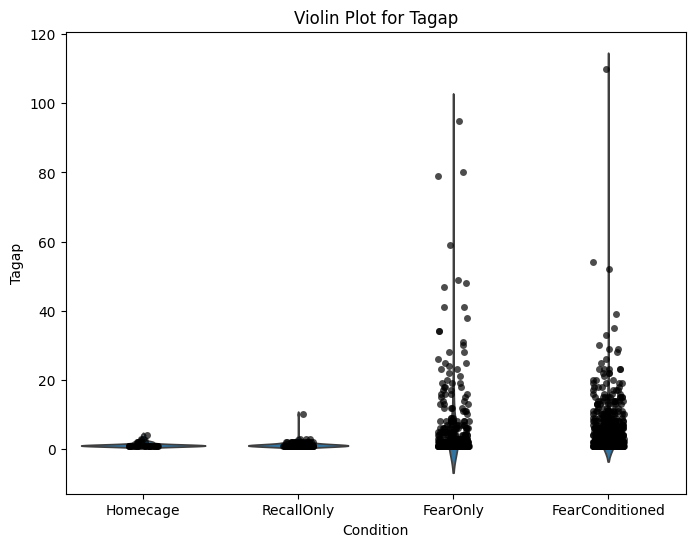

In [12]:
# we identified this above
violin_plot("Tagap")